# Project: Wrangling and Analyze Data

## Data Gathering
In the this project ,data from three(3) different sources will be needed for the analysis.First of all I needed data from the ***twitter_archive.csv*** file, which I downloadeded from the udacity classroom page.Secondly , I needed data from the **tsv image file** which I downloaded programmatically using python's requests library .The last data file I needed was a data file which i had to generate from twitter with help of **Twitter's API** and python's **tweepy** library, I wrote this data file as a json file and then converted it with the help of pandas into a nice dataframe.

### loading the various python libraries that will be needed in this analysis

In [1]:
#importing the various libraries need for my analysis
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
from timeit import default_timer as timer

In [2]:
# reading the twitter-archive csv file using pandas
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Using the Requests library to download the tweet image prediction **(`image_predictions.tsv`)**


In [54]:
#using the requests library to download the tsv file 
folder_name = 'image_predictions_file'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
#opening the file 
with open(os.path.join(folder_name, url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [4]:
#reading file 
image_predictions = pd.read_csv('image-predictions (1).tsv',sep='\t')

3. Using the Tweepy library to query additional data via the Twitter API **(`tweet_json.txt`)**

To avoiding displaying my API keys and secrets in the work , I created a separate notebook conataining my my API keys and secrets.I then loadeed the keys and secrets into this notebook using a python magic funtion .I deleted this notebook after my work

In [56]:
# running the notebook containing my API keys and secrets
%run ./keys.ipynb

In [57]:
#
auth=tweepy.OAuthHandler(consumer_keys,consumer_secret)
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [58]:
# this is the reference key for the information to be gathered using twitter's API.The id's will be what would be reference in 
# the gathering of the data.

tweet_ids=twitter_archive.tweet_id

The next step is to write a json file and request that the API save the data I requested into that json file and this should be done line by line,one tweet id at a time.**`Twitter's rate limit`** is taken into consideration while gathering the information

In [59]:
#creating a fails dictionary to hold the various tweet ids that didnt pass the try method called
fails_dict = {}
start = timer()
count=0
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json1', 'w',encoding='UTF-8') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('%s\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
20

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

After writing the json file ,the next thing is to read it line by line to create a data dictionary

In [5]:
# reading the json file line by line and converting it into a dataframe using pandas
with open('tweet_json1','r') as json_file:
    file=[]
    for line in json_file:
        lines=line.replace('\n','')
        file.append(lines)
length_of_line=len(file)
tweet_id=[]
retweet_count=[]
likes_count=[]
data={'tweet_id':[],'retweet_count':[],'favorite_count':[]}
for i in range(length_of_line):
    dictionary=json.loads(file[i])
    tweet_id.append(dictionary['id'])
    retweet_count.append(dictionary['retweet_count'])
    likes_count.append(dictionary['favorite_count'])
data.update({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':likes_count})
tweets=pd.DataFrame(data)

## Assessing Data

After successfully gathering the data ,the next step was to assess it for its quality and tidiness.In this aspect ,I used both visual and programmatic methods of assessing the data .
With the **visual method** ,I had to scan through the datasets to find what could possibly be wrong with the data in terms of spellings,ommissions, duplicates ,incorrect datatypes, and a whole lot,I made use of google sheets in viewing my csv file.
With the **programmatic method** , I had to write and run some codes to display the each dataset's makeup and properties.
This method made use of some key python functions/methods such as **`.info()`** ,**`.value_count()`**,**`.describe()`** and a few others.

## Twitter_archive_enhanced dataset(twitter_archive) assessment

In [6]:
# printing the first 5 lines of the dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
# counting the number of various names present in the dataset
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Buddy         7
Daisy         7
an            7
Toby          7
Bailey        7
Koda          6
Dave          6
Leo           6
Stanley       6
Rusty         6
Milo          6
Jack          6
Jax           6
Oscar         6
Scout         6
Bella         6
Alfie         5
           ... 
Snoop         1
Maks          1
Torque        1
Tanner        1
Jay           1
Wesley        1
Coopson       1
Kobe          1
Leonidas      1
Mollie        1
Tug           1
Steve         1
Cecil         1
Antony        1
Kloey         1
Jangle        1
Tripp         1
Rose          1
Alfy          1
Billy         1
Farfle        1
Grey          1
Geno          1
Malikai       1
Dietrich      1
Ivar          1
Kollin        1
Mack          1
Shelby        1
Rambo         1
Name: name, Length: 957,

In [7]:
# counting the number of urls that are in the dataset
twitter_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/817827839487737858/video/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/698195409219559425/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/667138269671505920/photo/1                                                                                                                                                          

In [8]:
#checking for the total number of duplicates in the dataset
twitter_archive.duplicated().sum()

0

In [9]:
 # returning a value count of the various rating denominators 
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
# returning a value count of the various rating numerators 
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bd14d9f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3bcf2602e8>]], dtype=object)

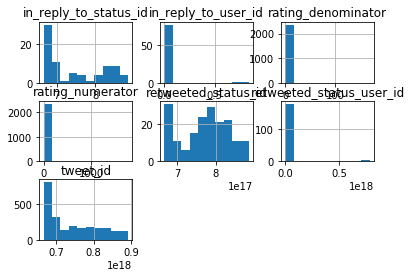

In [11]:
# plotting a histogram to help identify how the dataset's various attributes are distributed
twitter_archive.hist(bins=10)

## Image_prediction dataset(image_prediction) assessment

In [7]:
# printing the first 5 lines of the dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
# getting an overall summary of the dataset
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# assessing the statistics of the attributes of the image prediction dataframe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
# checking for duplicates in the dataset
image_predictions.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bcef5f7f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3bcecc2240>]], dtype=object)

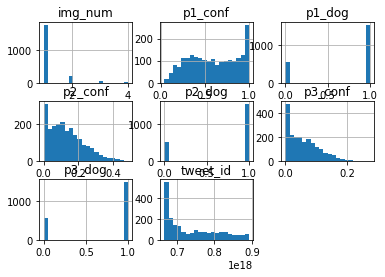

In [20]:
#plotting a histogram to identify the distribution threads of various attributes 
image_predictions.hist(bins=20)

## Tweets dataset(tweets) assessment

In [31]:
# printing the first 5 lines of the datset
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [22]:
tweets.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [23]:
# getting an overall summary of the dataset
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
# summary statistics of the dataset's attributes
tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [25]:
sum(tweets.duplicated())

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bcec10128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3bce9e1438>]], dtype=object)

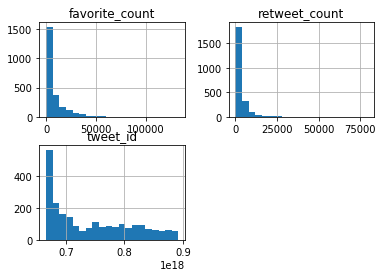

In [26]:
tweets.hist(bins=20)

### Quality issues
**First of all ,retweets are not needed and should be discarded before proceeding**
To identify which posts are retweets and which are original ,I made use of the retweeted_status_id column.When an entry within this column is empty(NaN,None) it meant the post was original and vice versa.So I dropped all entries that had values under the retweeted_status_id column.
**`Twitter_archive_enhanced`**

1.Tweet_id should be ***'string'*** not ***'int'***

2.Mispelling of confidence as conf

3.Timestamp should be in ***datetime*** and not ***str***

4.Some values in rating denominator column isn't "10"

**`Image_prediction`**

5.Tweet_id should be ***'string'*** not ***'int'***

6.Names in the p columns have some upper letter and some lower letter

**`Tweets`**

7.***'id'*** column name should be ***'tweet_id'*** instead of "id"

8.tweet_id should be ***'string'*** not ***'int'***

### Tidiness issues

**twitter_archive_enhanced**
    
1.doggo, floofer, pupper, and puppo should be in one column not in four separate columns.

2.**All three(3) datasets have to be merged together to form one single dataset**

In [9]:
#making sure there are really retweets within the dataset
retweets=twitter_archive.loc[twitter_archive['retweeted_status_id'].notnull(),:]

In [10]:
retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [11]:
# dropping the retweeted data
twitter_archive= twitter_archive.drop(twitter_archive.loc[twitter_archive['retweeted_status_id'].notnull(),:].index)

I also decided to tackle one of the tidiness issues that will be made mention of soon; Collapsing the dog stages columns into one column and discarding the parent columns.

In [13]:
# combining the doggo,floofer ,puppo and pupper columns in one called dog_stage
twitter_archive['dog_stage'] = twitter_archive[['doggo','floofer','pupper','puppo']].sum(axis=1) == 2

In [15]:
# dropping the individual dog stage columns
twitter_archive.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

In [16]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,False
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,False
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,False
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,False


# Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### copying the dataframes

In [17]:
# Make copies of original pieces of data
df1=twitter_archive.copy()
df2=image_predictions.copy()
df3=tweets.copy()

**The first four(4) data quality issues are those of the twitter_archive_enhanced dataset**

### Issue 1:

Tweet_id should be ***'string'*** not ***'int'***

#### Define: 

converting the **tweet_id** datatype from ***int*** to ***string***

#### Code

In [18]:
df1['tweet_id'] = df1['tweet_id'].astype(str)

#### Test

In [19]:
type(df1['tweet_id'][0])

str

### Issue 2:

 columns name "p_conf" should be "p_confidence"

#### Define
Rename p_conf columns to p_confidence


#### Code

In [87]:
# using panda's renaming method to rename column names
df1.rename(columns={'p1_conf': 'p1_confidence'}, inplace=True)
df1.rename(columns={'p2_conf': 'p2_confidence'}, inplace=True)
df1.rename(columns={'p3_conf': 'p3_confidence'}, inplace=True)

#### Test

In [89]:
#calling the p_confidence columns
df1[['p1_confidence','p2_confidence','p3_confidence']]

,p1_confidence,p2_confidence,p3_confidence
0,0.097049,0.085851,0.076110
1,0.323581,0.090647,0.068957
2,0.716012,0.078253,0.031379
3,0.170278,0.168086,0.040836
4,0.555712,0.225770,0.175219
5,0.425595,0.116317,0.076902
6,0.341703,0.199287,0.193548
7,0.566142,0.178406,0.076507
8,0.487574,0.193054,0.118184
9,0.511319,0.451038,0.029248


### issue 3:
Timestamp should be in ***datetime*** and not ***str***

### Define 

convert Timestamp's datatype to datetime 

### code

In [27]:
#using datetime funtion to convert timestamp datatype to datetime
df1['timestamp']= pd.to_datetime(df1['timestamp'])

### Test

In [28]:
type(df1['timestamp'][0])


pandas._libs.tslibs.timestamps.Timestamp

### Issue 4:
Some values in rating denominator column isn't "10"

### Define

Replace all denominators less than 10 with the value **`10`**

### code

In [29]:
# using the replace method to set all denominators to 10
df1.rating_denominator = df1.rating_denominator.replace( range(0,1000) , 10 )  

### Test

In [30]:
# counting the unique number of denominators 
df1.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

### Issue 5:(image prediction quality issue)
tweet_id should be a string instead of an integer

### Define

convert the ***tweet_id*** datatype from **int** to **str**

### Code

In [31]:
# converting from int to str using astype method
df2['tweet_id']=df2['tweet_id'].astype(str)

### Issue 6: (image_prediction quality issue)
Some of the names in the p column begin with small letters

### Define

Make all names begin with capital letters

### Code

In [32]:
#starting each word in the p column with a capital letter
df2.p1= df2.p1.str.title()
df2.p2 = df2.p2.str.title()
df2.p3 = df2.p3.str.title()

### Test

In [33]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue 7:(Tweets dataset quality issue)
The **id** column should be **tweet_id**


### Define

Rename the 'id' column to 'tweet_id'

### code

In [34]:
# renaming columns
df3.rename(columns={'id':'tweet_id'},inplace=True)

### Test

In [35]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue 8:(Tweets dataset quality issue)

The datatype of tweet_id should be ***str*** not ***int***

## Define

convert the datatype of **tweet_id** to string

## Code

In [36]:
df3['tweet_id']=df3['tweet_id'].astype(str)

## Test

In [42]:
type(df3['tweet_id'][0])

str

## CLEANING TIDINESS ISSUES

### Issue 1

Merge all three datasets together to create a master dataset

### Define

merge all three datasets using pandas merge methode

### Code

In [42]:
# using pandas merge method to combine datasets based on tweet_id
df1= pd.merge(df1 , df2 , on= "tweet_id" , how="left") 
df1 = pd.merge(df1 , df3 , on= "tweet_id" , how="left")

### Test

In [45]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774,41048


### Issue 1 :
doggo, floofer, pupper, and puppo should be in one column not in four separate columns

### Define

extract dog stage from text and put it in new column 

### Code

***This issue has already been solved***

### Test

***This issue has already been solved***

### Dropping some columns not relevant in my analysis

In [46]:
# dropping the columns I dont need for my analysis
df1 = df1.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'])

In [47]:
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url_x,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,False,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,False,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,False,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,False,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774,41048


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 48 columns):
tweet_id              2354 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             1994 non-null object
jpg_url_x             2073 non-null object
img_num_x             2073 non-null float64
p1_x                  2073 non-null object
p1_conf_x             2073 non-null float64
p1_dog_x              2073 non-null object
p2_x                  2073 non-null object
p2_conf_x             2073 non-null float64
p2_dog_x              2073 non-null object
p3_x                  2073 non-null object
p3_conf_x             2073 non-null float64
p3_dog_x              2073 non-null object
retweet_count_x    

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [49]:
# saving the cleaned and merged dataset as twitter_archive.csv
df1.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, I decided to provide answers to two research questions. The insights that I revealed were backed by visualizuations.**

### Research Questions

1. What is the most **Favoured** and the most **retweeted** post?
2. Which prediction model is the most successful?

**Which post is the most liked?**

In [50]:
tweet_df=pd.read_csv('twitter_archive_master.csv')

In [51]:
tweet_df

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,False,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,False,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,False,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,False,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,False,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774,41048
5,5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,False,...,0.425595,True,Irish_Terrier,0.116317,True,Indian_Elephant,0.076902,False,3261,20562
6,6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,False,...,0.341703,True,Border_Collie,0.199287,True,Ice_Lolly,0.193548,False,2158,12041
7,7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,False,...,0.566142,True,Eskimo_Dog,0.178406,True,Pembroke,0.076507,True,16716,56848
8,8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,False,...,0.487574,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True,4429,28226
9,9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,False,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467


In [52]:
# sorting favorite counts and assigning it to new variable
most_liked_posts=tweet_df.sort_values(by=['favorite_count'],ascending=False)[['text','favorite_count','name']].head(10)

In [53]:
#  help dispaly the full text 
pd.set_option("display.max_colwidth", -1)

In [54]:
most_liked_posts

,text,favorite_count,name
309,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,132810,None
775,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,131075,None
58,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,107956,Duddles
400,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,107015,Stephan
108,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",106827,Jamesy
333,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,95450,Bo
93,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,85011,Zoey
402,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",75639,None
135,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,75193,quite
810,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,75163,None


In [55]:
# setting the name column as the index 
most_liked_posts.set_index('name', inplace=True)

In [56]:
# Set style of plots with seaborn
sns.set(style="darkgrid",font_scale=1.2)

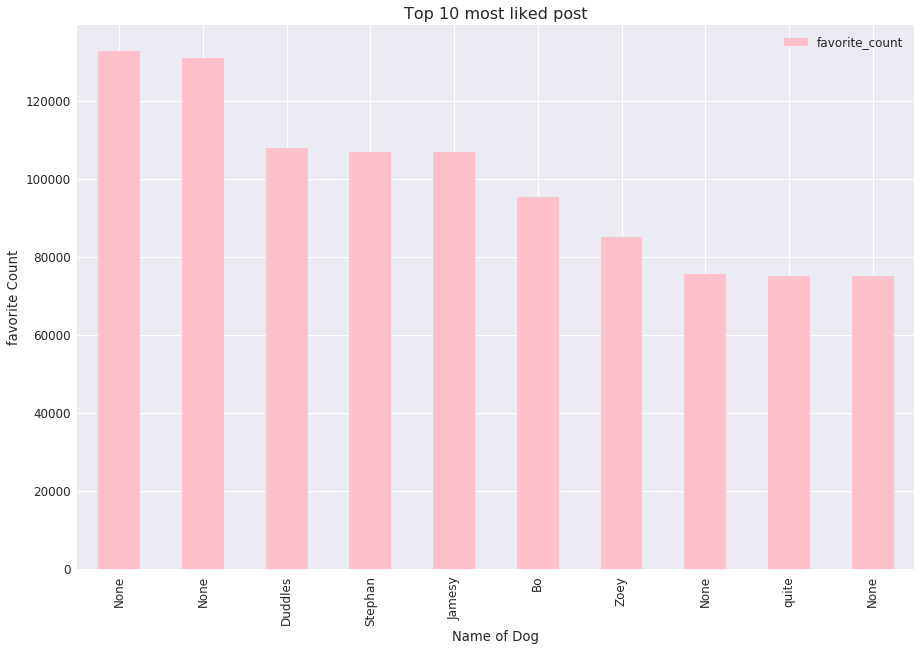

In [57]:
#plotting a bar graph for top 10 most liked posts
most_liked_posts.plot(kind='bar', color=['pink'], figsize=(15,10))
plt.title('Top 10 most liked post', fontsize=16)
plt.xlabel('Name of Dog')
plt.ylabel('favorite Count')
plt.show()

In [81]:
most_liked_posts.head(1)

,text,favorite_count
name,,
None,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,132810


Insight: The post ***'Here's a super supportive puppo participating in the Toronto #WomensMarch today.'*** has the most likes.

**Which post is the most retweeted?**

In [58]:
# sorting the retweets counts and assigning to new variable
most_retweeted_posts=tweet_df.sort_values(by=['retweet_count'],ascending=False)[['text','retweet_count','name']].head(10)

In [59]:
# to help dispaly the full text 
pd.set_option("display.max_colwidth", -1)

In [60]:
most_retweeted_posts

,text,retweet_count,name
775,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,79515,None
400,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,56625,Stephan
2063,NaN,56625,NaN
810,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,52360,None
2227,NaN,52360,NaN
309,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,48265,None
58,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,45849,Duddles
2049,NaN,42228,NaN
333,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,42228,Bo
2068,NaN,37911,NaN


In [62]:
# setting name column as index
most_retweeted_posts.set_index('name', inplace=True)

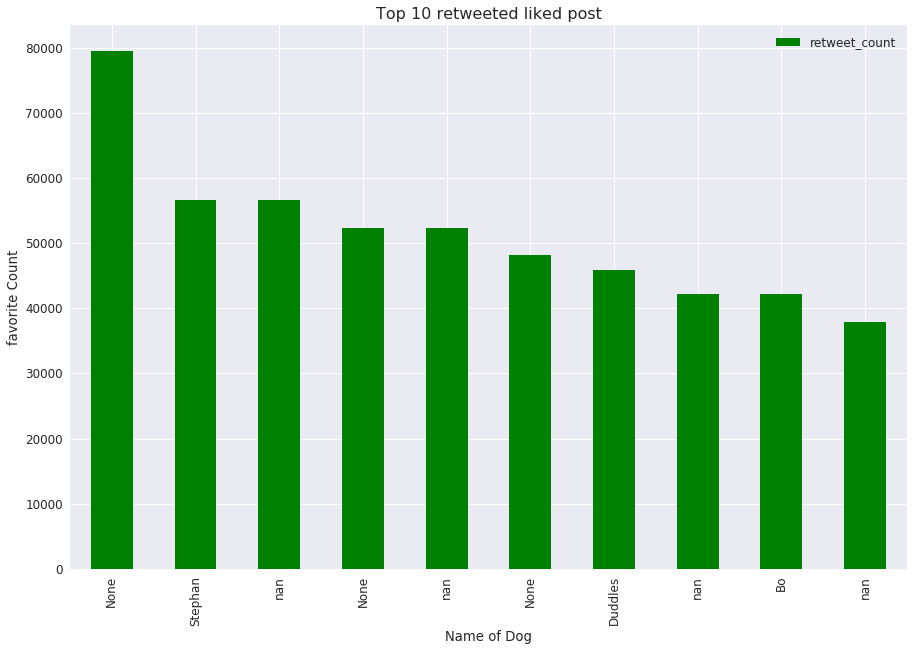

In [63]:
# plotting a bar graph of top 10 most retweeted post
most_retweeted_posts.plot(kind='bar', color=['green'], figsize=(15,10))
plt.title('Top 10 retweeted liked post', fontsize=16)
plt.xlabel('Name of Dog')
plt.ylabel('favorite Count')
plt.show()

Insight: The post ***'Here's a doggo realizing you can stand in a pool.'*** has the most retweets

**Which prediction model is the most successful?**

In [64]:
# returns count of true and false
tweet_df['p1_dog'].value_counts()

True     1531
False    542 
Name: p1_dog, dtype: int64

In [65]:
#calculating success percentage
total= (1531+542)
sucsses_p1 = (1531/total)*100
sucsses_p1

73.8543174143753

<Container object of 2 artists>

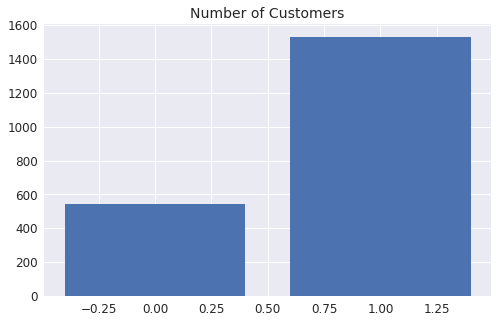

In [67]:
# plotting a bar chart for prediction model 1
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=tweet_df['p1_dog'].value_counts().index,
        height=tweet_df.p1_dog.value_counts().values)

In [68]:
# returns count of true and false
tweet_df['p2_dog'].value_counts()

True     1552
False    521 
Name: p2_dog, dtype: int64

In [69]:
# calculating success percentage
total= (1552+521)
sucsses_p2 = (1552/total)*100
sucsses_p2

74.86734201640135

<Container object of 2 artists>

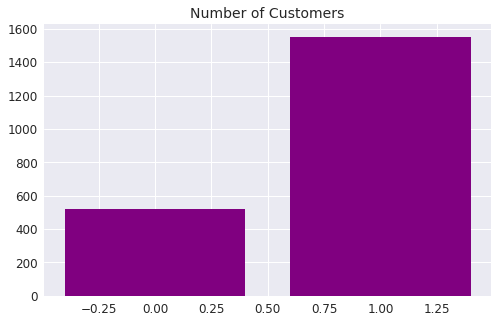

In [78]:
#plotting a bar chart for prediction model 2
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=tweet_df['p2_dog'].value_counts().index,
        height=tweet_df.p2_dog.value_counts().values,color=['purple'])

In [72]:
tweet_df['p3_dog'].value_counts()

True     1498
False    575 
Name: p3_dog, dtype: int64

In [73]:
total= (1498+575)
sucsses_p3 = (1498/total)*100
sucsses_p3

72.26242161119151

<Container object of 2 artists>

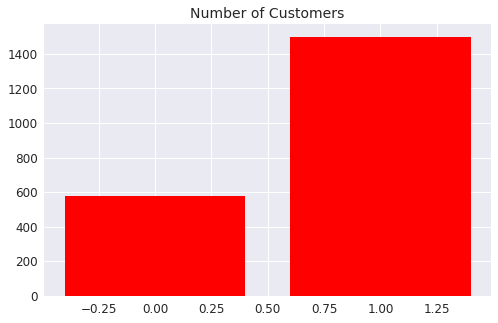

In [75]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=tweet_df['p3_dog'].value_counts().index,
        height=tweet_df.p3_dog.value_counts().values,color=['red'])

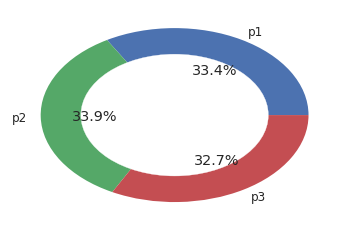

In [80]:
plt.pie([sucsses_p1,sucsses_p2,sucsses_p3],labels=('p1','p2','p3'),autopct ='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Insights:
From the donut chart above it is clear that:

1.prediction model `p2` is the most successive among the three.

2.Predicton model `p3` is the least successive among the three.


In [92]:
#zipping my workfile
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0

References

-**Youtube vidoes**:on how to use tweepy

-**kaggle data analysis**: on twitter data

-**stackoverflow**: reading and writing a json file
and a whole lot of other websites I referred to each time I got stack on a certain problem
